#  Algebra

* Set of objects
* Operations on those objects
* Laws for those operations

#  Make illegal states unrepresentable

* Use sum types instead of product types
  where appropriate

In [ ]:
case class Route(started: Boolean, finished: Boolean)

In [ ]:
sealed trait RouteStatus
case object Created extends RouteStatus
case object Started extends RouteStatus
case object Finised extends RouteStatus

case class Route(status: RouteStatus)

# From partial to total

In [ ]:
def parseInt(s: String): Option[Int] =
  try {
    Some(s.toInt)
  } catch {
    case e: NumberFormatException => None
  }

In [ ]:
val reciprocal: PartialFunction[Int,Double] = {
  case x if x != 0 => 1.toDouble / x
}

In [ ]:
val f = reciprocal.lift
f(0)

# Smart constructors

In [ ]:
case class Employee(name: String, age: Int)
object Employee {
  def apply(name: String, age: Int): Option[Employee] =
    if (age >= 18) Some(new Employee(name, age)) else None
}

# Replacing null

In [ ]:
val o = null
if (o != null) {
  o.method()
  // ...
}

In [ ]:
// DON'T DO THIS!!!
if (o.isDefined) {
  val v = o.get
  // ...
}

In [ ]:
o match {
  case Some(i) => i
  case None => 0
}

#  Exercise

Substitute the match expressions with functions



In [ ]:
option match {
  case None => {}
  case Some(x) => foo(x)
}


*Type*: Unit



In [ ]:
option.foreach(foo)

#  Exercise

Substitute the match expressions with functions



In [ ]:
option match {
  case None => Nil
  case Some(x) => x :: Nil
}


*Type*: List



In [ ]:
option.toList

#  Exercise

Substitute the match expressions with functions



In [ ]:
option match {
  case None => false
  case Some(_) => true
}

*Type*: Boolean


In [ ]:
option.isDefined

#  Exercise

Substitute the match expressions with functions



In [ ]:
option match {
  case None => true
  case Some(_) => false
}


*Type*: Boolean



In [ ]:
option.isEmpty

#  Exercise

Substitute the match expressions with functions



In [ ]:
option match {
  case None => true
  case Some(x) => foo(x)
}


*Type*: Boolean



In [ ]:
option.forall(foo)

#  Exercise

Substitute the match expressions with functions



In [ ]:
option match {
  case None => false
  case Some(x) => foo(x)
}


*Type*: Boolean



In [ ]:
option.exists(foo)

#  Exercise

Substitute the match expressions with functions



In [ ]:
option match {
  case None => None
  case Some(x) => Some(foo(x))
}


*Type*: Option



In [ ]:
option.map(foo)

#  Exercise

Substitute the match expressions with functions



In [ ]:
option match {
  case None => None
  case Some(x) => foo(x)
}


*Type*: Option



In [ ]:
option.flatMap(foo)

#  Exercise

Substitute the match expressions with functions



In [ ]:
option match {
  case None => None
  case Some(x) => x
}


*Type*: Option



In [ ]:
option.flatten

#  Exercise

Substitute the match expressions with functions



In [ ]:
option match {
  case None => foo
  case Some(x) => Some(x)
}


*Type*: Option



In [ ]:
option.orElse(foo)

#  Exercise

Substitute the match expressions with functions



In [ ]:
option match {
  case None => foo
  case Some(x) => x
}


*Type*: type of foo/x



In [ ]:
option.getOrElse(foo)

# Extractors

In [ ]:
object Email {
  def unapply(str: String): Option[(String, String)] = {
    val parts = str.split("@")
    if (parts.length == 2)
      Some((parts(0), parts(1)))
    else None
  }
}

# Seq extractors

In [ ]:
object Words {
  def unapplySeq(str: String): Option[Seq[String]] =
    Some(str.split(" ").toSeq)
}

# Regex

In [ ]:
import scala.util.matching.Regex
val ISODate = new Regex("""(\d{4})-(\d{2})-(\d{2})""")

# Scala- Functional Effects

##### Vassil Dichev

14.04.2021


# Effects

* Partiality
* Exceptions/errors
* Nondeterminism
* Dependency injection/configuration
* Logging
* Mutable state
* Input/output
* Asynchronicity


# Effects are good, side effects are bugs!
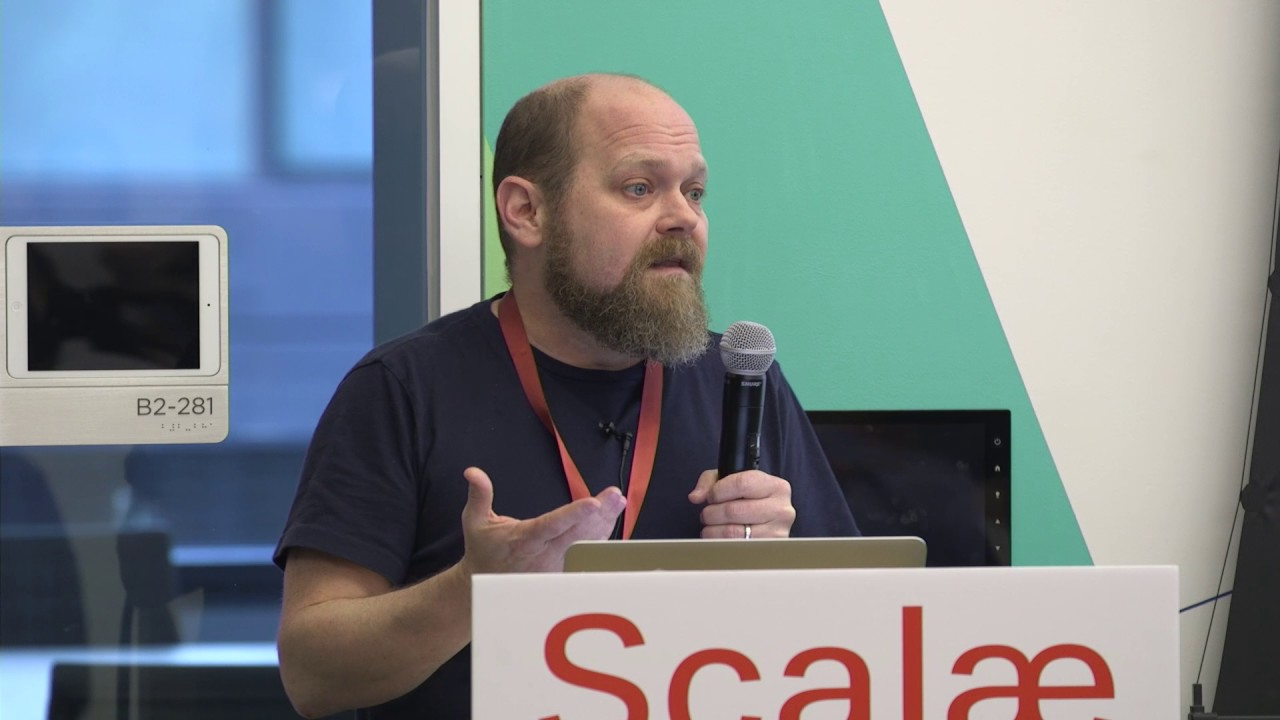

# Effects

* Partiality- Option


* Exceptions/errors- Try/Either


* Nondeterminism- List


* Dependency injection- Reader
* Logging- Writer
* Mutable state- State


* Input/Output- IO


* Asynchronicity- Future


#  Type aliases



In [ ]:
type Params = Map[String,String]

# Partiality and exceptions



In [ ]:
def extract(params: Params) = params("num")
def parse(s: String) = s.toInt
val reciprocal: PartialFunction[Int,Double] = {
  case x if x != 0 => 1.toDouble / x
}
val process = extract _ andThen parse andThen reciprocal

#  Why even try?



In [ ]:
try {
    try {
    } finally {
    }
    try {
        try {
        } finally {
        }
    } finally {
    }
} finally {
    try {
    } finally {
    }
}

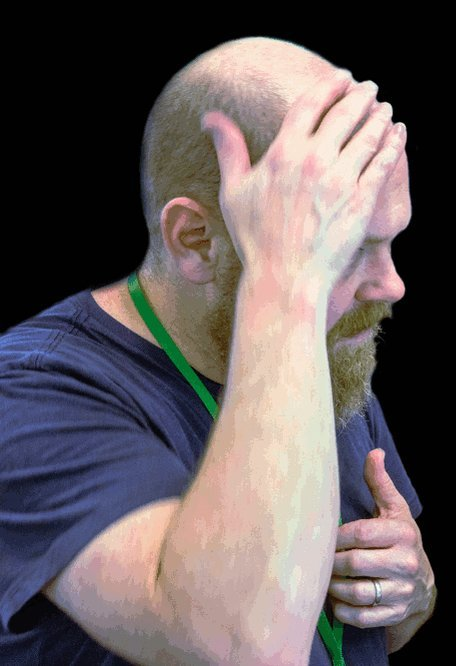

# Exceptional problems

* No static guarantees


* Hard to compose


* Coupled error handling


* Tied to the current thread


* Not a value


# Option



In [ ]:
def extractMaybe(params: Params) = params.get("num")
def parseMaybe(s: String) = try {
  Some(s.toInt)
} catch {
  case e: NumberFormatException => None
}
val reciprocalMaybe = reciprocal.lift

In [ ]:
def processMap(params: Params) =
  (extractMaybe(params) map parseMaybe)

# Combining options



In [ ]:
def processMaybe(params: Params) =
  extractMaybe(params)
  .flatMap(parseMaybe)
  .flatMap(reciprocalMaybe)

In [ ]:
def processMaybe(params: Params) = for {
  param <- extractMaybe(params)
  num <- parseMaybe(param)
  r <- reciprocalMaybe(num)
} yield r

# Try



In [ ]:
import scala.util.{Try,Success,Failure}
val s = Success(1)
val f = Failure(new RuntimeException("Something went wrong"))

In [ ]:
def extractTry(params: Params) = Try(params("num"))
def parseTry(s: String) = Try(s.toInt)
def reciprocalTry(i: Int) = Try(reciprocal(i))

# Failure is not an Option



In [ ]:
def processTry(params: Params) = for {
  param <- extractTry(params)
  num <- parseTry(param)
  r <- reciprocalTry(num)
} yield r

#  Either

In [ ]:
val right: Either[String,Int] = Right(1)
val left : Either[String,Int] = Left("Something went wrong")

> Either is what's right or whatever's left
>
> *Some very clever person*

In [ ]:
val o1: Option[Int] = Some(1)
val o2: Option[Int] = None
o1.toRight("Error message")

In [ ]:
o2.toRight("Error message")

# Modeling errors



In [ ]:
sealed trait ProcessingError
case class KeyNotFound(key: String) extends ProcessingError
case class NotNumeric(s: String) extends ProcessingError
case object DivisionByZero extends ProcessingError

In [ ]:
def processEither(params: Params) = for {
  param <- extractMaybe(params) toRight KeyNotFound("num")
  num <- parseMaybe(param) toRight NotNumeric(param)
  r <- reciprocalMaybe(num) toRight DivisionByZero
} yield r

#  IO



In [ ]:
import scala.io.StdIn._
case class IO[A](val unsafeRun: () => A)
object Console {
  def putStrLn(line: String): IO[Unit] = IO(() => println(line))
  def getStrLn: IO[String] = IO(() => readLine())
}
import Console._

In [ ]:
val run = putStrLn("Hello")
(run, run)

In [ ]:
(putStrLn("Hello"), putStrLn("Hello"))

#  IO with map



In [ ]:
case class IO[A](val unsafeRun: () => A) {
  def map[B](f: A => B) = IO(() => f(this.unsafeRun()))
}
object Console {
  def putStrLn(line: String): IO[Unit] = IO(() => println(line))
  def getStrLn: IO[String] = IO(() => readLine())
}
import Console._

#  IO with flatMap



In [ ]:
case class IO[A](val unsafeRun: () => A) {
  def map[B](f: A => B) = IO(() => f(this.unsafeRun()))
  def flatMap[B](f: A => IO[B]): IO[B] =
    IO(() => f(this.unsafeRun()).unsafeRun())
}
object Console {
  def putStrLn(line: String): IO[Unit] = IO(() => println(line))
  def getStrLn: IO[String] = IO(() => readLine())
}
import Console._

#  IO in for comprehensions



In [ ]:
val program = for {
  _     <- putStrLn("What is your name?")
  name  <- getStrLn
  _     <- putStrLn("Hello, " + name + ", welcome!")
} yield ()

# Advantages of IO

* It's a value- can combine, optimize, etc.


* Asynchronicity


* Cancellation


* Scheduling and retrying


* Test and production instances


* Different frontends


In [ ]:
import $ivy.`org.typelevel::cats-core:2.4.1`

In [ ]:
import concurrent.Future

def extractFutureEither(params: Params): Future[Either[ProcessingError,String]] =
  Future.successful(extractMaybe(params) toRight KeyNotFound("num"))

def parseFutureEither(param: String): Future[Either[ProcessingError,Int]] =
  Future.successful(parseMaybe(param) toRight NotNumeric(param))

def reciprocalFutureEither(num: Int): Future[Either[ProcessingError,Double]] =
  Future.successful(reciprocalMaybe(num) toRight DivisionByZero)

In [ ]:
import concurrent.ExecutionContext.Implicits.global

def processFutureEither(params: Params) = for {
  paramEither <- extractFutureEither(params)
  numEither <- paramEither match {
    case Right(param) => parseFutureEither(param)
    case l @ Left(_) => Future.successful(l)
  }
  rEither <- numEither match {
    case Right(num: Int) => reciprocalFutureEither(num)
    case l @ Left(_) => Future.successful(l)
  }
} yield rEither

In [ ]:
processFutureEither(Map("num"->"4"))

In [ ]:
case class FutureEither[E,A](value: Future[Either[E,A]]) {
  def map[B](f: A => B): FutureEither[E,B] =
    FutureEither(value.map(_.map(f)))
  def flatMap[B](f: A => FutureEither[E,B]): FutureEither[E,B] = FutureEither(value.flatMap {
    case Right(r) => f(r).value
    case Left(l) => Future.successful(Left[E,B](l))
  })
}

In [ ]:
def processFutureEither(params: Params) = for {
  param <- FutureEither(extractFutureEither(params))
  num <- FutureEither(parseFutureEither(param))
  r <- FutureEither(reciprocalFutureEither(num))
} yield r

In [ ]:
processFutureEither(Map("num" -> "6"))

In [ ]:
case class ListEither[E,A](value: List[Either[E,A]]) {
  def map[B](f: A => B): ListEither[E,B] =
    ListEither(value.map(_.map(f)))
  def flatMap[B](f: A => ListEither[E,B]): ListEither[E,B] = ListEither(value.flatMap {
    case Right(r) => f(r).value
    case Left(l) => List(Left[E,B](l))
  })
}

In [ ]:
import cats.data.EitherT
def processEitherT(params: Params) = for {
  param <- EitherT(extractFutureEither(params))
  num <- EitherT(parseFutureEither(param))
  r <- EitherT(reciprocalFutureEither(num))
} yield r

In [ ]:
processEitherT(Map("num"->"5")).value